## Q2

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('laptop_price_dataset.csv')

<u>Plot the price of all the laptops</u>

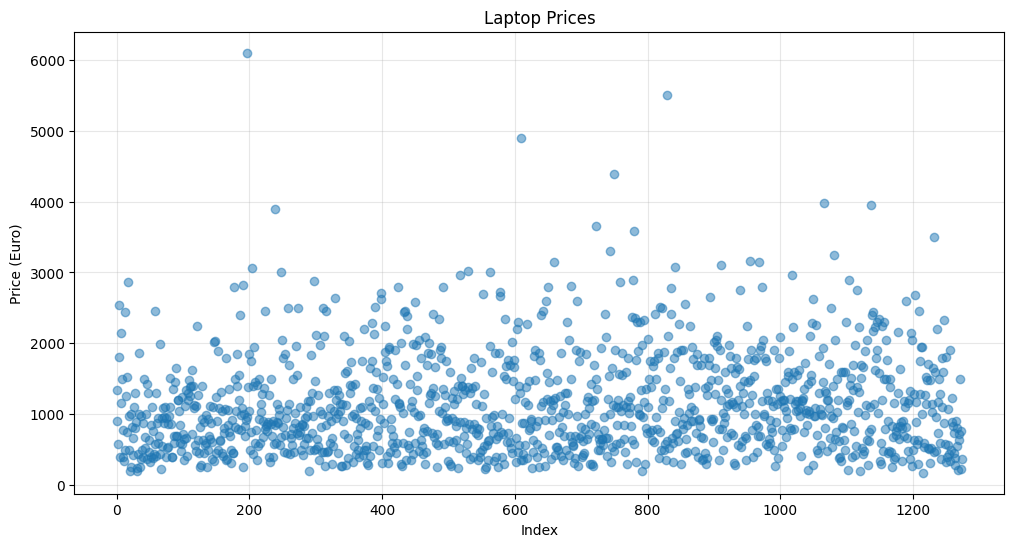

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(df['Price (Euro)'], marker='o', linestyle='none', alpha=0.5)
plt.title('Laptop Prices')
plt.xlabel('Index')
plt.ylabel('Price (Euro)')
plt.grid(True, alpha=0.3)
plt.show()

<u>What is the average laptop price for each company?</u>

In [70]:
grouped_companies = df.groupby('Company')  
prices_by_company = grouped_companies['Price (Euro)']  
company_averages = prices_by_company.mean().sort_values(ascending=False)
print("\nAverage laptop price by company:", company_averages)


Average laptop price by company: Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


<u>Which company has on average the most expensive laptop? </u>

In [71]:
print(f"\nMost expensive company on average: {company_averages.index[0]}")


Most expensive company on average: Razer


<u>Find the different types of Operating systems present in the data</u>

In [72]:
# Merging all the varients into one category
def clean_os(os):
    os = os.lower()
    if 'mac' in os:
        return 'macOS'
    elif 'windows' in os:
        return 'Windows'
    elif 'no os' in os:
        return 'No OS'
    else:
        return os

# Cleaning and then counting all the different categories
df['OpSys'] = df['OpSys'].apply(clean_os)
unique_os = df['OpSys'].unique()
print("\nUnique Operating Systems:", unique_os)


Unique Operating Systems: ['macOS' 'No OS' 'Windows' 'linux' 'android' 'chrome os']


<u>Plot for each of the operating system types the distribution of the prices</u>

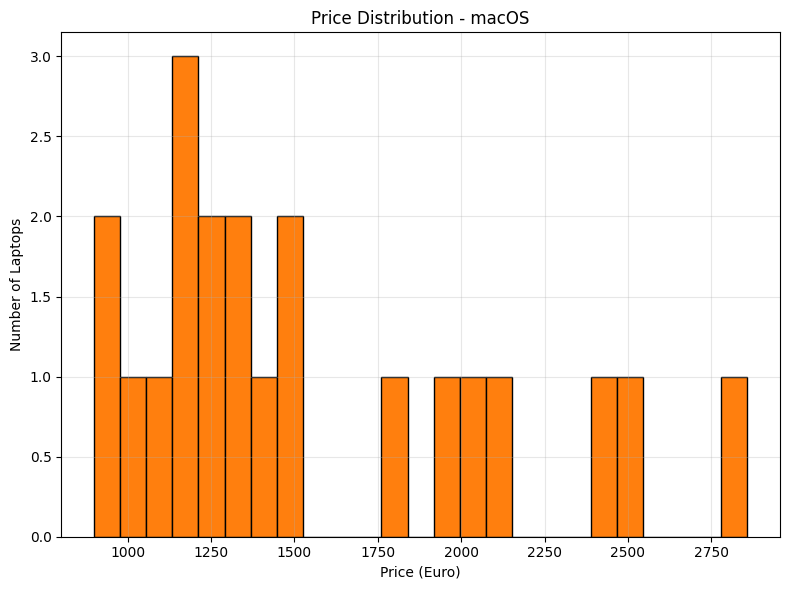

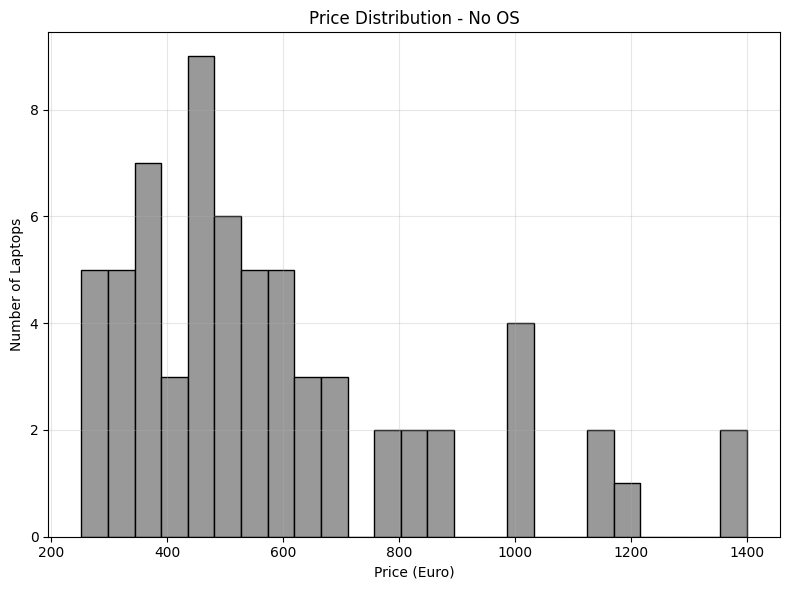

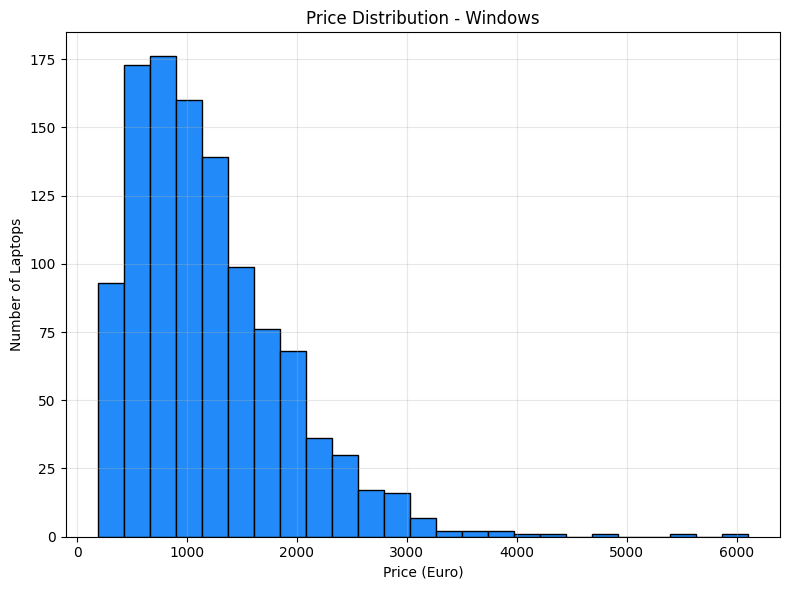

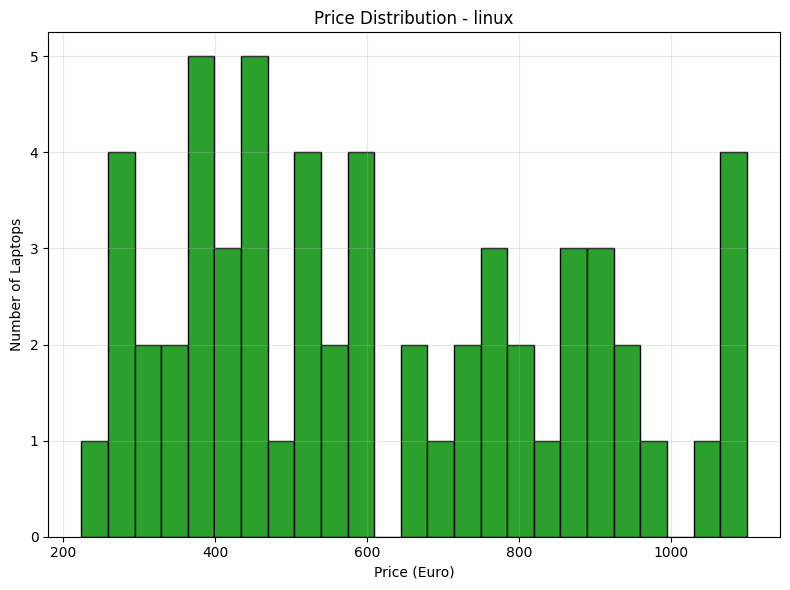

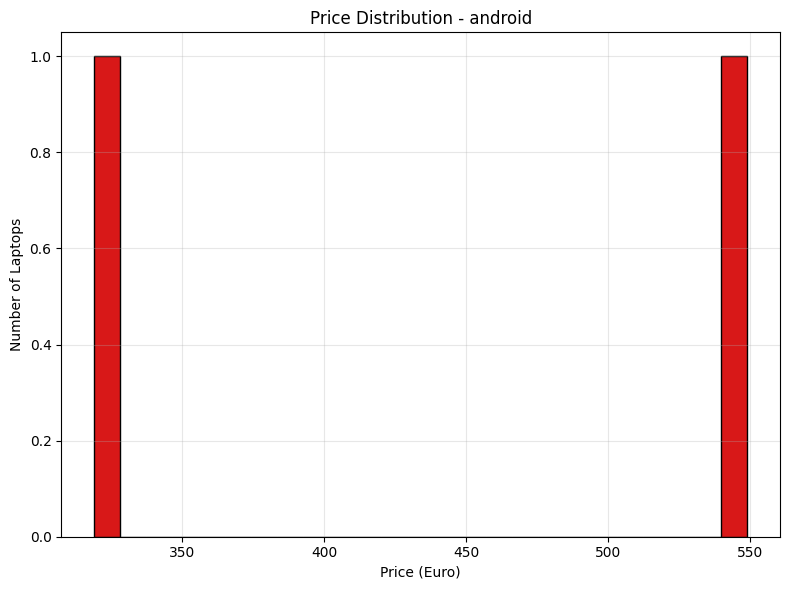

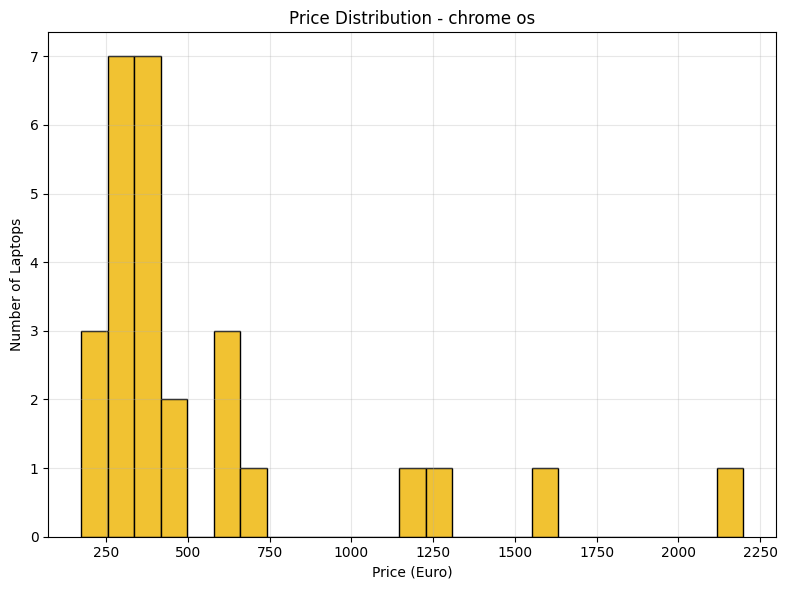

In [73]:
# Different colors for each OS for ease of telling them apart in a glance
colors = ['#ff7f0e','#999999','#228bf9','#2ca02c','#d81818','#f1c232']

# Creating a plot for each OS
for i, os_name in enumerate(unique_os):
    os_data = df[df['OpSys'] == os_name]['Price (Euro)']
    
    plt.figure(figsize=(8, 6))
    plt.hist(os_data, bins=25, edgecolor='black', linewidth=1, color=colors[i])
    
    plt.title(f'Price Distribution - {os_name}')
    plt.xlabel('Price (Euro)')
    plt.ylabel('Number of Laptops')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


<u>What is the relationship between RAM and computer price?</u>

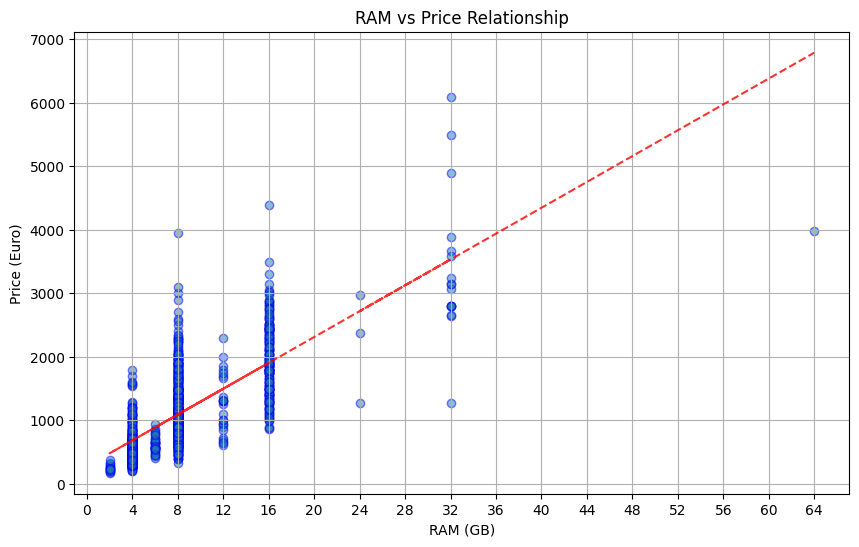

In [74]:
# Creating a basic scatter plot for RAM and price
plt.figure(figsize=(10, 6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'],alpha=0.5,edgecolor='blue')
plt.title('RAM vs Price Relationship')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.xticks(np.arange(0, 65, 4))
plt.grid(True)

# Adding trend line
coefficients = np.polyfit(df['RAM (GB)'], df['Price (Euro)'], 1)
polynomial = np.poly1d(coefficients)
x_values = df['RAM (GB)'].unique()
plt.plot(x_values, polynomial(x_values), "r--", alpha=0.8)
plt.show()

We can see that there's a linear relationship between the amount of RAM and them price, where the computer has a higher price the more RAM it has.

<u>Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory"</u>

In [75]:
# This function is so that if there's more than one type of memory (as there is in some computers)
# the new column would be able to display both types rather than just one of them
def extract_storage_types(memory_str):
    storage_types = []
    if 'SSD' in memory_str:
        storage_types.append('SSD')
    if 'HDD' in memory_str:
        storage_types.append('HDD')
    if 'Flash Storage' in memory_str:
        storage_types.append('Flash Storage')
    if 'Hybrid' in memory_str:
        storage_types.append('Hybrid')
    return ' + '.join(storage_types)

df['Storage Type'] = df['Memory'].apply(extract_storage_types)
print(df[['Memory', 'Storage Type']].head(25))

                  Memory   Storage Type
0              128GB SSD            SSD
1    128GB Flash Storage  Flash Storage
2              256GB SSD            SSD
3              512GB SSD            SSD
4              256GB SSD            SSD
5              500GB HDD            HDD
6    256GB Flash Storage  Flash Storage
7    256GB Flash Storage  Flash Storage
8              512GB SSD            SSD
9              256GB SSD            SSD
10             500GB HDD            HDD
11             500GB HDD            HDD
12             256GB SSD            SSD
13             256GB SSD            SSD
14             256GB SSD            SSD
15             256GB SSD            SSD
16             256GB SSD            SSD
17             512GB SSD            SSD
18               1TB HDD            HDD
19             128GB SSD            SSD
20    32GB Flash Storage  Flash Storage
21  128GB SSD +  1TB HDD      SSD + HDD
22             500GB HDD            HDD
23             256GB SSD            SSD


---
### Bonus questions

<u> What would be the strongest computer?</u></p>
A computer which is great for computationally expensive tasks. </p>
This would be measured by trying to maximize both RAM and CPU frequency.

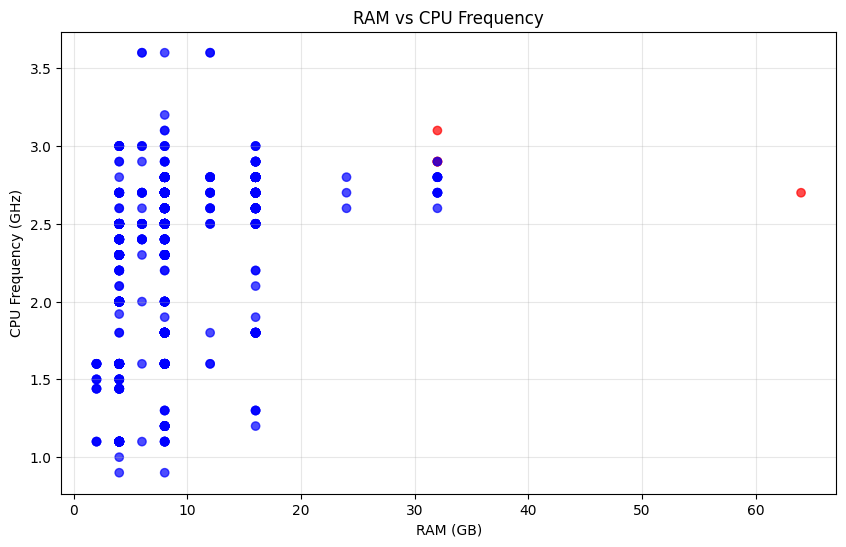

In [76]:
# Calculatues the computers with best RAM and CPU frequency by multiplying them and comparing the results
df['power_score'] = df['RAM (GB)'] * df['CPU_Frequency (GHz)']
top_5_power = df.nlargest(5, 'power_score')

# Colors the top 5 computers red in the graph
colors = ['red' if idx in top_5_power.index else 'blue' for idx in df.index]

plt.figure(figsize=(10, 6))
plt.scatter(df['RAM (GB)'], df['CPU_Frequency (GHz)'], c=colors, alpha=0.7)
plt.xlabel('RAM (GB)')
plt.ylabel('CPU Frequency (GHz)')
plt.title('RAM vs CPU Frequency')
plt.grid(True, alpha=0.3)
plt.show()


Now we'll take the top 5 computers in terms of power and look at the rest of their specs so we can more fully compare the computers and pick the one that best suits us. 

In [77]:
print("Top 5 Strongest Computers:")
print(top_5_power.to_string())

Top 5 Strongest Computers:
     Company            Product  TypeName  Inches                     ScreenResolution CPU_Company          CPU_Type  CPU_Frequency (GHz)  RAM (GB)                Memory GPU_Company          GPU_Type    OpSys  Weight (kg)  Price (Euro) Storage Type  power_score
1066    Asus         ROG G701VO    Gaming    17.3          IPS Panel Full HD 1920x1080       Intel    Core i7 6820HK                  2.7        64               1TB SSD      Nvidia   GeForce GTX 980  Windows         3.58        3975.0          SSD        172.8
610   Lenovo       Thinkpad P51  Notebook    15.6      IPS Panel 4K Ultra HD 3840x2160       Intel  Xeon E3-1535M v6                  3.1        32               1TB SSD      Nvidia     Quadro M2200M  Windows         2.50        4899.0          SSD         99.2
177      MSI    GT80S 6QF-074US    Gaming    18.4                    Full HD 1920x1080       Intel    Core i7 6920HQ                  2.9        32  512GB SSD +  1TB HDD      Nvidia      

<u>What would be the best student computer?</u></p>
A computer which is can be easily carried around while still in the budget of a broke student. It would also need to be strong enough to be able to complete any programming assignments. </p>
This would be measured by trying to minimize wieght and price, while not going below 16 RAM. 

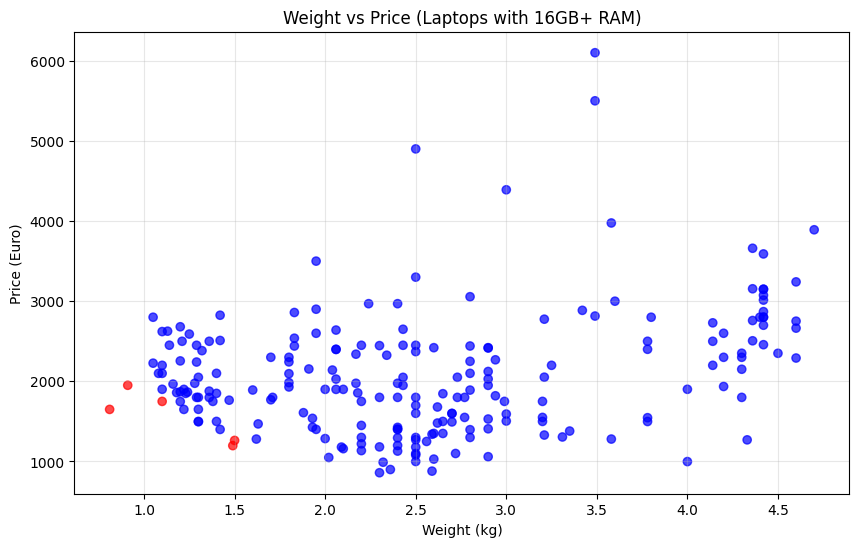

In [78]:
# Calculatues the computers with best RAM and CPU frequency (with 16+ RAM) by multiplying them 
# and comparing the results
filtered_df = df[df['RAM (GB)'] >= 16].copy()
filtered_df['student_score'] = filtered_df['Weight (kg)'] * filtered_df['Price (Euro)']
top_5_student = filtered_df.nsmallest(5, 'student_score')

# Colors the top 5 computers red in the graph
colors = ['red' if idx in top_5_student.index else 'blue' for idx in filtered_df.index]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Weight (kg)'], filtered_df['Price (Euro)'], c=colors, alpha=0.7)
plt.xlabel('Weight (kg)')
plt.ylabel('Price (Euro)')
plt.title('Weight vs Price (Laptops with 16GB+ RAM)')
plt.grid(True, alpha=0.3)
plt.show()


Now we'll take the top 5 computers in terms of student suitability and look at the rest of their specs so we can more fully compare the computers and pick the one that best suits us. 

In [79]:
print("\nTop 5 Student-Friendly Computers:")
print(top_5_student.sort_values(by='student_score', ascending=False).to_string())


Top 5 Student-Friendly Computers:
     Company          Product   TypeName  Inches                 ScreenResolution CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)                Memory GPU_Company          GPU_Type    OpSys  Weight (kg)  Price (Euro) Storage Type  power_score  student_score
384     Asus     Zenbook Flip  Ultrabook    13.3  Full HD / Touchscreen 1920x1080       Intel  Core i7 7500U                  2.7        16             512GB SSD       Intel   HD Graphics 620  Windows         1.10        1748.9          SSD         43.2        1923.79
110     Asus     VivoBook S15  Ultrabook    15.6                Full HD 1920x1080       Intel  Core i7 8550U                  1.8        16  256GB SSD +  1TB HDD      Nvidia     GeForce MX150  Windows         1.50        1262.0    SSD + HDD         28.8        1893.00
92        HP      Probook 430   Notebook    13.3                Full HD 1920x1080       Intel  Core i7 8550U                  1.8        16             512GB 